# Visualize results Multi Class Segmentation

In [20]:
# imports 
import numpy as np
from monai.transforms import (
    Compose,
    LoadImaged,
    LoadImage,
    ScaleIntensityd,
    MapLabelValued,
    AsDiscrete
)
from monai.data import  decollate_batch

from monai.data import Dataset, DataLoader
import os

import matplotlib.pyplot as plt
import glob
import pytorch_lightning as pl
import torch

from unet_pl import UNetL
from data import MMWHS_test
import torch

from monai.networks.nets import UNet

In [21]:
pl.seed_everything(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Seed set to 42


In [22]:
labels = [1, 0, 2, 0, 3, 0, 0]

In [23]:
data_dir = "../data/other/CT_withGT_proc/annotated"

test_fold = [18, 19]
dataset_test = MMWHS_test(data_dir, test_fold, labels) 
test_loader = DataLoader(dataset_test, batch_size=1, num_workers=4)


In [24]:
def visualize(patch_data_loader, model):
    i=0
    post_trans = Compose([AsDiscrete(argmax=True)])

    for image, label in patch_data_loader:
        outputs = model.forward(image.to(device)).detach().cpu()
        vis_outputs = post_trans(outputs[0])
        plt.figure(figsize=(5, 2.5))
        plt.subplot(1, 3, 1)
        # plt.title(f"preprocessed case")
        plt.axis("off")
        plt.imshow(vis_outputs.squeeze())
        plt.subplot(1, 3, 2)
        plt.axis("off")
        plt.imshow(image.squeeze(), cmap="gray")
        plt.subplot(1, 3, 3)
        plt.axis("off")
        plt.imshow(label.squeeze())
        plt.show()
        break

In [25]:
def k_folds_testing_unet(models, test_loader):
    for pretrained_model in models:
        model = UNet(
            spatial_dims=2,
            in_channels=1,
            out_channels=4,
            channels=(16, 32, 64, 128, 256), #(64, 128, 256, 512, 1024)
            strides=(2, 2, 2, 2),
            num_res_units=2, # 0
            # act=RELU
        )
    
        #init_weights_norm(model)
        model.to(device)
        print(f"Testing model {pretrained_model}")
        # Load the state dictionary
        model.load_state_dict(torch.load(pretrained_model, map_location=torch.device('cpu')))
        model.eval()
        visualize(test_loader, model)

In [26]:
def visualize_data(patch_data_loader):
    i=0

    for batch in patch_data_loader:
        image, label = batch["img"][0], batch["seg"][0]
        
       
        plt.figure(figsize=(5, 2.5))
        plt.subplot(1, 2, 1)
        # plt.title(f"preprocessed case")
        plt.axis("off")
        plt.imshow(label.squeeze())
        plt.subplot(1, 2, 2)
        plt.axis("off")
        plt.imshow(image.squeeze(), cmap="gray")
        plt.show()

        i += 1
        # if i == 3:
        #     break

In [27]:
def check_data(train_loader, val_loader):
    print("Check training data")
    for batch in train_loader:
        image, label = batch["img"][0], batch["seg"][0]
        # find unique values in label
        print(label.shape)
        print(torch.unique(label))




## FS, NA, DRIT - Residual Unet

Testing model checkpoints/Name_training_CT_LR_0.0001_BS_4_modality_CT_epochs_300_label_MYO_LV_RV_loss_Dice_model_unet_folds_5/fold_2/best_model_25.pth


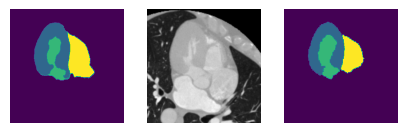

Testing model checkpoints/Name_training_CT_LR_0.0001_BS_4_modality_CT_epochs_300_label_MYO_LV_RV_loss_Dice_model_unet_folds_5/fold_4/best_model_99.pth


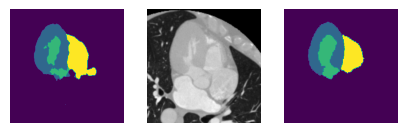

Testing model checkpoints/Name_training_CT_LR_0.0001_BS_4_modality_CT_epochs_300_label_MYO_LV_RV_loss_Dice_model_unet_folds_5/fold_3/best_model_166.pth


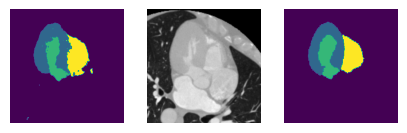

Testing model checkpoints/Name_training_CT_LR_0.0001_BS_4_modality_CT_epochs_300_label_MYO_LV_RV_loss_Dice_model_unet_folds_5/fold_1/best_model_33.pth


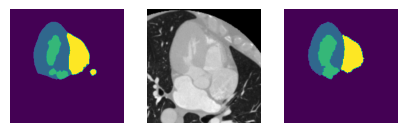

Testing model checkpoints/Name_training_CT_LR_0.0001_BS_4_modality_CT_epochs_300_label_MYO_LV_RV_loss_Dice_model_unet_folds_5/fold_0/best_model_61.pth


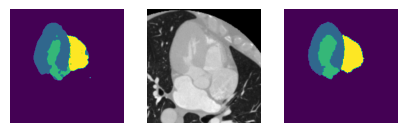

In [28]:
name = 'Name_training_CT_LR_0.0001_BS_4_modality_CT_epochs_300_label_MYO_LV_RV_loss_Dice_model_unet_folds_5'
dir_checkpoint = os.path.join('checkpoints/', name)
models = glob.glob(os.path.join(dir_checkpoint, "fold_*/*.pth"))
k_folds_testing_unet(models, test_loader)

Testing model checkpoints/Name_training_fake_CT_LR_0.0001_BS_4_modality_CT_epochs_300_label_MYO_LV_RV_loss_Dice_model_unet_folds_5/fold_2/best_model_24.pth


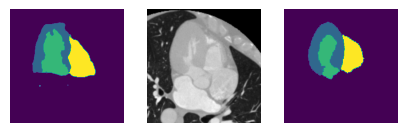

Testing model checkpoints/Name_training_fake_CT_LR_0.0001_BS_4_modality_CT_epochs_300_label_MYO_LV_RV_loss_Dice_model_unet_folds_5/fold_4/best_model_155.pth


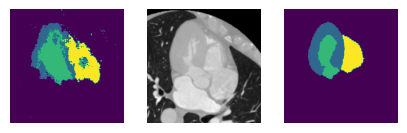

Testing model checkpoints/Name_training_fake_CT_LR_0.0001_BS_4_modality_CT_epochs_300_label_MYO_LV_RV_loss_Dice_model_unet_folds_5/fold_3/best_model_20.pth


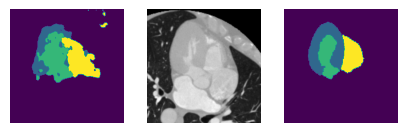

Testing model checkpoints/Name_training_fake_CT_LR_0.0001_BS_4_modality_CT_epochs_300_label_MYO_LV_RV_loss_Dice_model_unet_folds_5/fold_1/best_model_13.pth


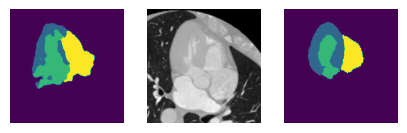

Testing model checkpoints/Name_training_fake_CT_LR_0.0001_BS_4_modality_CT_epochs_300_label_MYO_LV_RV_loss_Dice_model_unet_folds_5/fold_0/best_model_9.pth


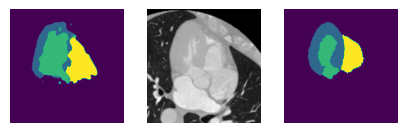

In [31]:
name = 'Name_training_fake_CT_LR_0.0001_BS_4_modality_CT_epochs_300_label_MYO_LV_RV_loss_Dice_model_unet_folds_5'
dir_checkpoint = os.path.join('checkpoints/', name)
models = glob.glob(os.path.join(dir_checkpoint, "fold_*/*.pth"))
k_folds_testing_unet(models, test_loader)

Testing model checkpoints/Name_training_MRI_LR_0.0001_BS_4_modality_MRI_epochs_300_label_MYO_LV_RV_loss_Dice_model_unet_folds_5/fold_2/best_model_45.pth


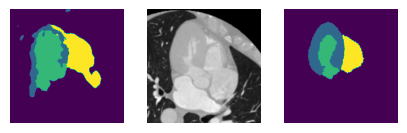

Testing model checkpoints/Name_training_MRI_LR_0.0001_BS_4_modality_MRI_epochs_300_label_MYO_LV_RV_loss_Dice_model_unet_folds_5/fold_4/best_model_44.pth


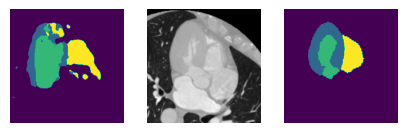

Testing model checkpoints/Name_training_MRI_LR_0.0001_BS_4_modality_MRI_epochs_300_label_MYO_LV_RV_loss_Dice_model_unet_folds_5/fold_3/best_model_39.pth


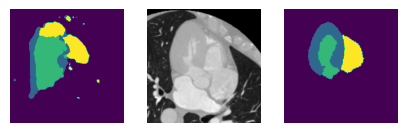

Testing model checkpoints/Name_training_MRI_LR_0.0001_BS_4_modality_MRI_epochs_300_label_MYO_LV_RV_loss_Dice_model_unet_folds_5/fold_1/best_model_32.pth


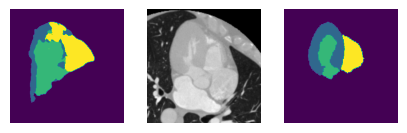

Testing model checkpoints/Name_training_MRI_LR_0.0001_BS_4_modality_MRI_epochs_300_label_MYO_LV_RV_loss_Dice_model_unet_folds_5/fold_0/best_model_33.pth


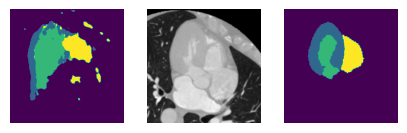

In [32]:
name = 'Name_training_MRI_LR_0.0001_BS_4_modality_MRI_epochs_300_label_MYO_LV_RV_loss_Dice_model_unet_folds_5'
dir_checkpoint = os.path.join('checkpoints/', name)
models = glob.glob(os.path.join(dir_checkpoint, "fold_*/*.pth"))
k_folds_testing_unet(models, test_loader)